# Hierarchical Clustering
Within this, we're going to use Scikit-Learn and Matplotlib to visualize how hierarchical clustering works.

In [69]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

data = pd.read_csv(
    'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')

In [55]:
data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [56]:
# Résumé des informations du dataframe
your_dataframe = data
print(f"\nshape: {your_dataframe.shape} \nlist columns :\n{
      your_dataframe.columns.tolist()} ")
print(f"liste des colonnes numeriques: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
# print(f"Colonne avec des na :{your_dataframe.isna().sum()} \n")
# print(f"\ndf head :\n{your_dataframe.head(2)} \n")
# print(f"\ndf describe :\n{your_dataframe.describe()} \n")


shape: (322, 21) 
list columns :
['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'] 
liste des colonnes numeriques: 
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']

liste des colonnes non numeriques: 
['Unnamed: 0', 'League', 'Division', 'NewLeague'] 


In [60]:
df = data.copy()

In [61]:
# Remove the several columns for the sake of this exercise
df.drop(['Unnamed: 0', 'League', 'Division',
         'NewLeague'], axis=1, inplace=True)

# Remove rows with NaN
# INSERT CODE HERE
df.dropna(axis=0, inplace=True)
# View the first five rows
# INSERT CODE HERE
df.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [62]:
# Only use the first 50 datapoints of the dataset for easy visualization
# INSERT CODE HERE
df50 = df.iloc[:50, :]

In [63]:
# View the shape of the data frame. It should be (50, 17)
# INSERT CODE HERE
df50.shape

(50, 17)

In [64]:
# Using the AgglomerativeClustering() function with a distance threshold of 0 and no n_clusters, fit the dataset.
# INSERT CODE HERE

# Instanciation du modele
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Entrainnement du modele
model = model.fit(df)

In [70]:
# Print out the distances of that model
# I.e. n_clusters_, min(), and max()
# INSERT CODE HERE


#  nombre de clusters
print(f"\nnombre de clusters :\n{model.n_clusters_} \n")

# Calculer les distances entre les observations
distances_inter_observations = pdist(model.children_, 'euclidean')

# Imprimer la distance minimale et maximale
print("Distance minimale :", distances_inter_observations.min())
print("Distance maximale :", distances_inter_observations.max())


nombre de clusters :
263 

Distance minimale : 1.4142135623730951
Distance maximale : 723.3871715754987


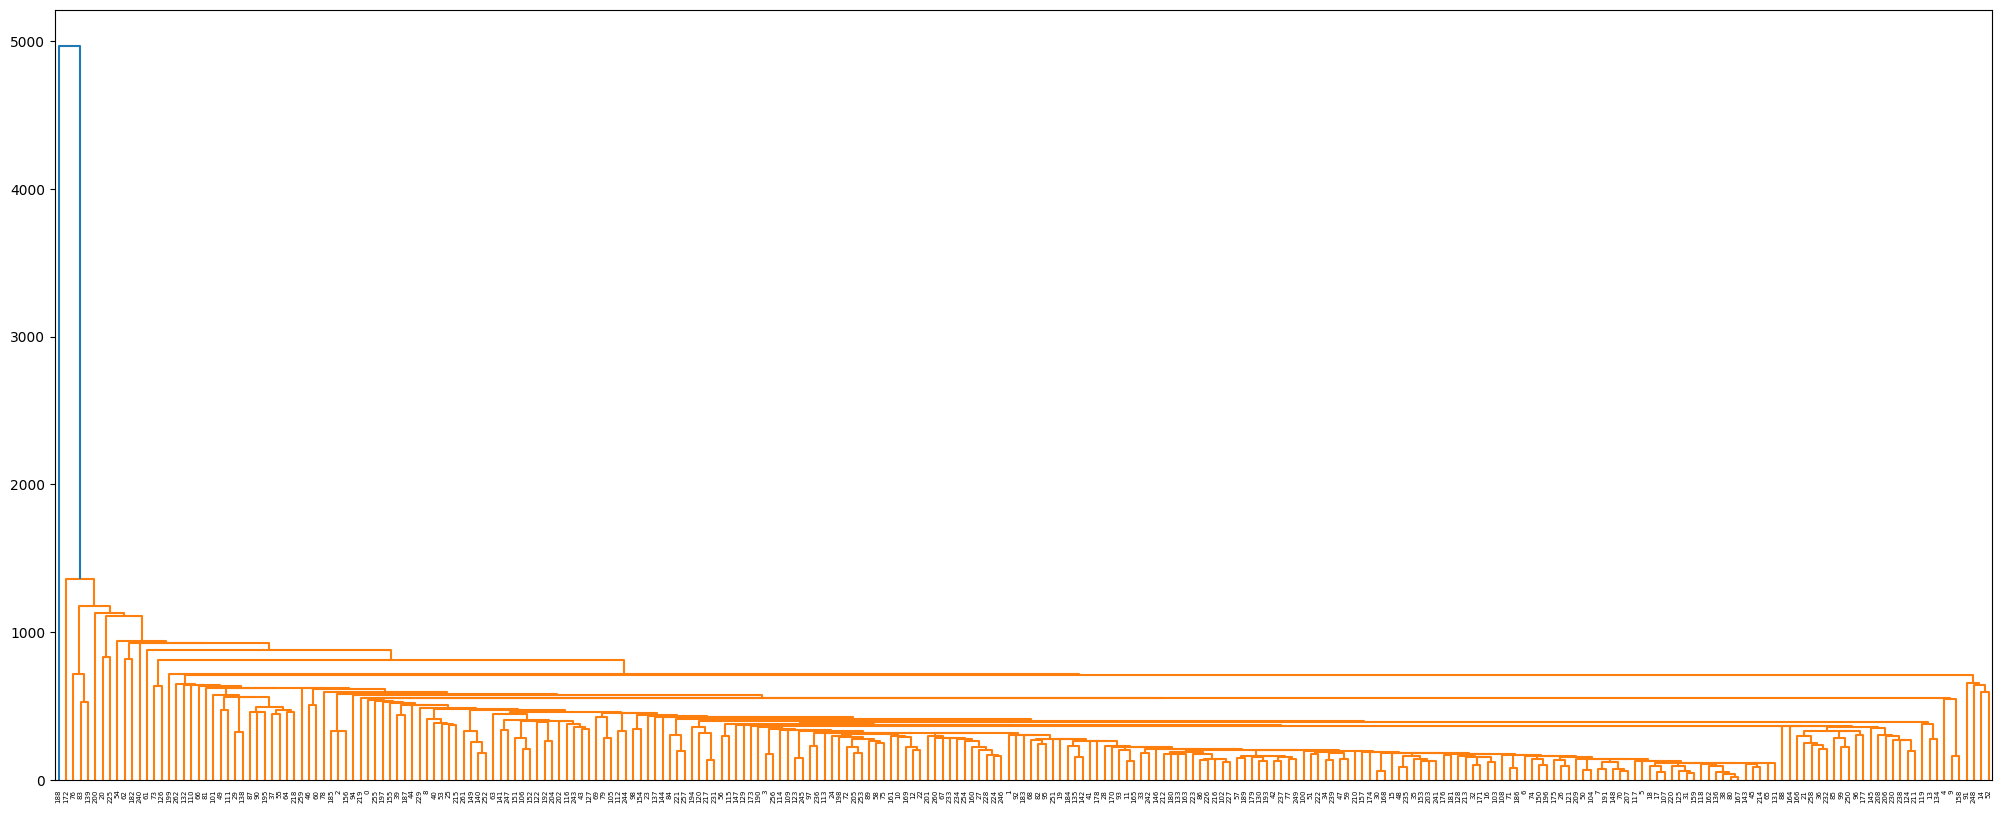

In [79]:
# Single
# Using single linkage, create and display a dendogram.
# INSERT CODE HERE

# Instanciation du modele
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Entrainnement du modele
model = model.fit(df)

# Effectuer un clustering hiérarchique avec un lien simple
Z = linkage(df, 'single')

# Créer un dendrogramme
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.show()

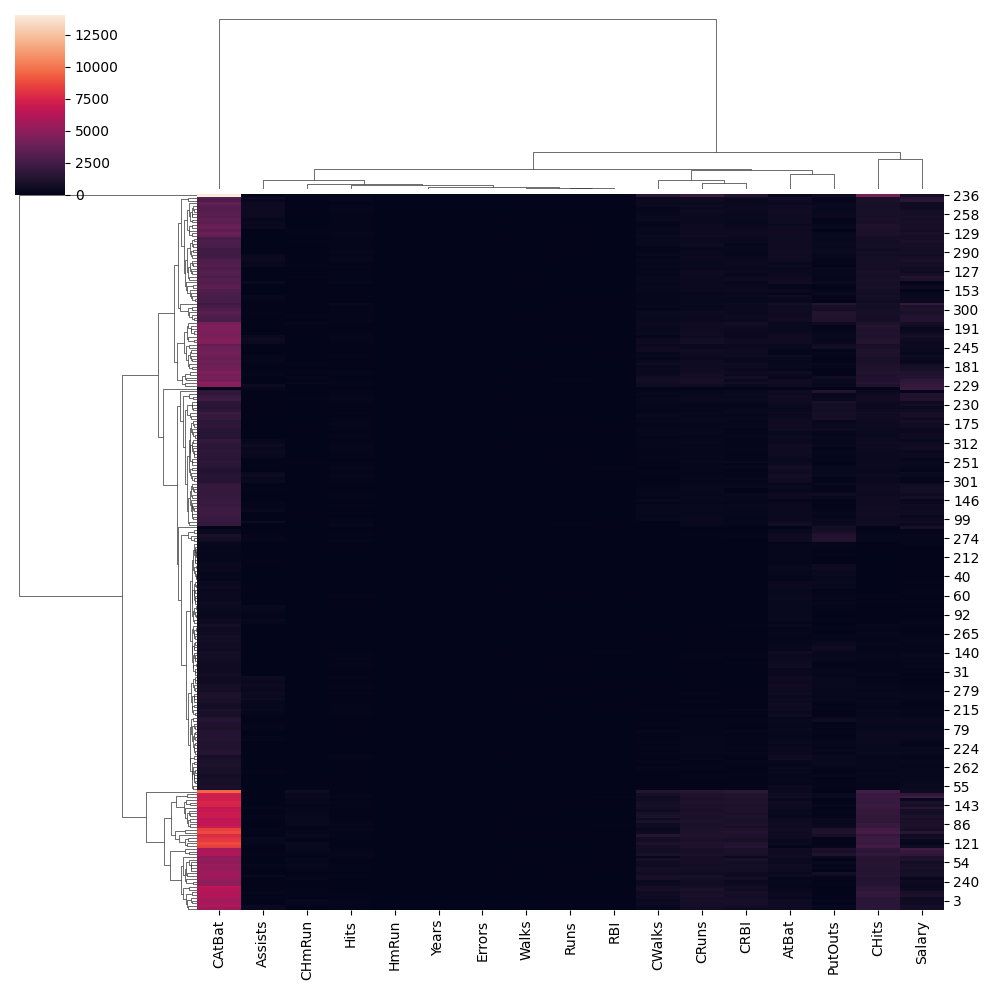

In [80]:
sns.clustermap(df)

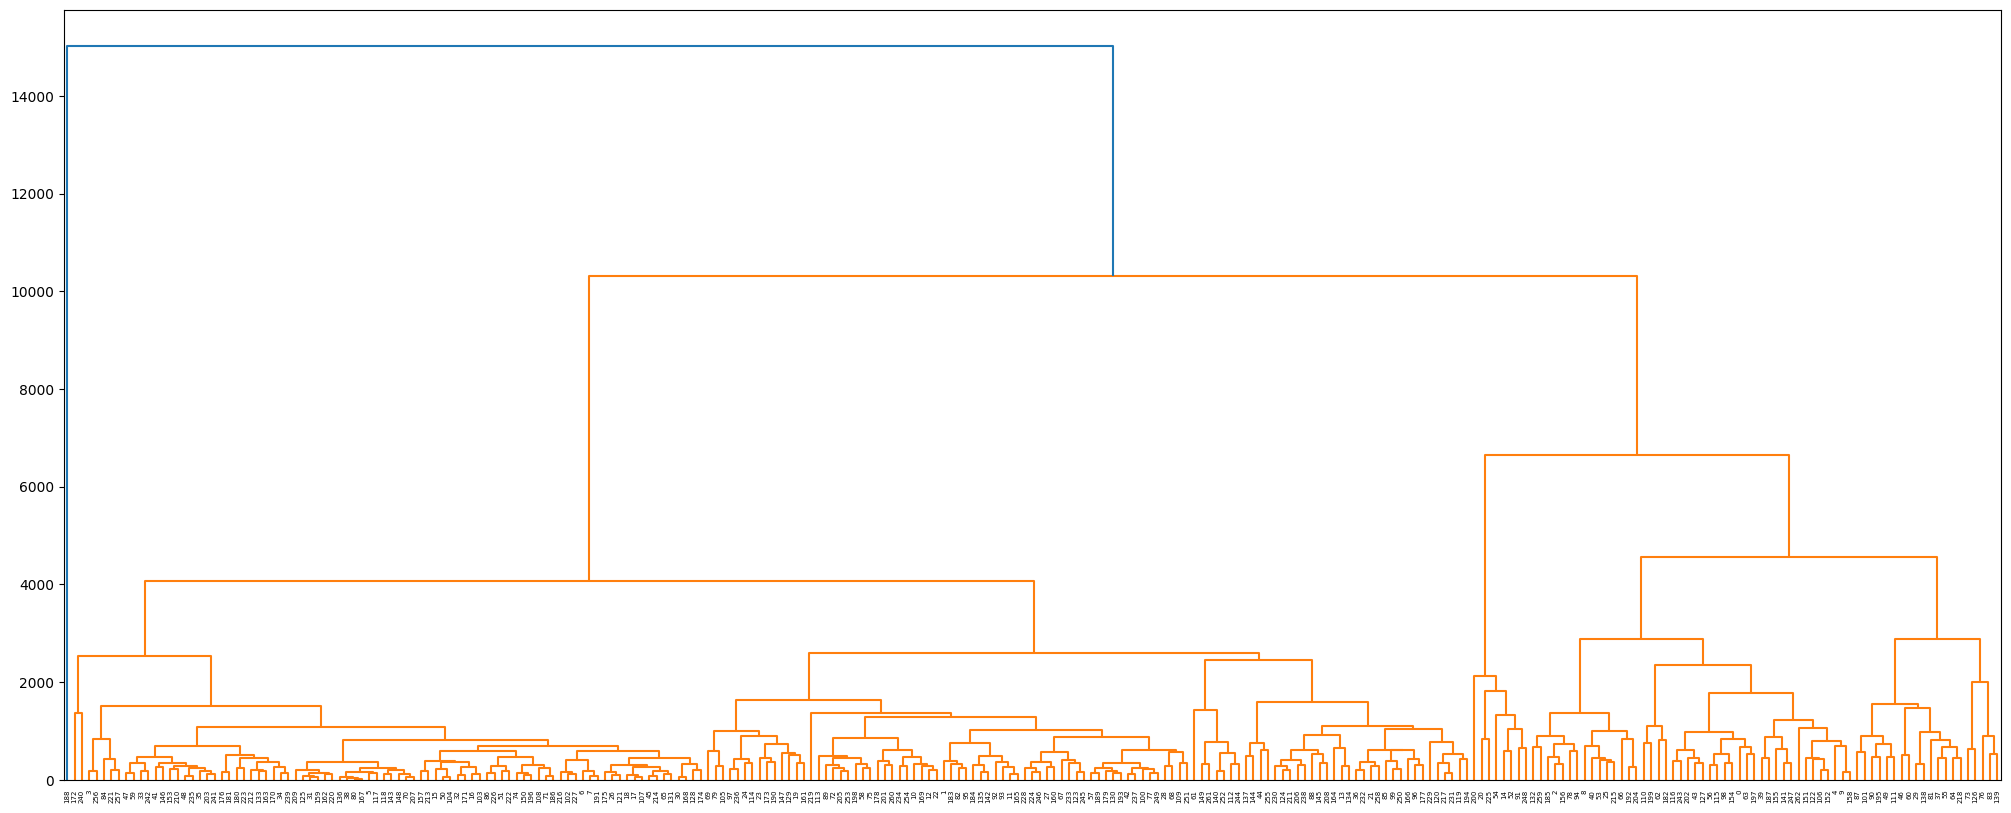

In [81]:
# Complete
# Using complete linkage, create and display a dendogram.
# INSERT CODE HERE
# Instanciation du modele
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Entrainnement du modele
model = model.fit(df)
#  clustering hiérarchique avec un lien complet
Z = linkage(df, 'complete')

# Créer un dendrogramme
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.show()

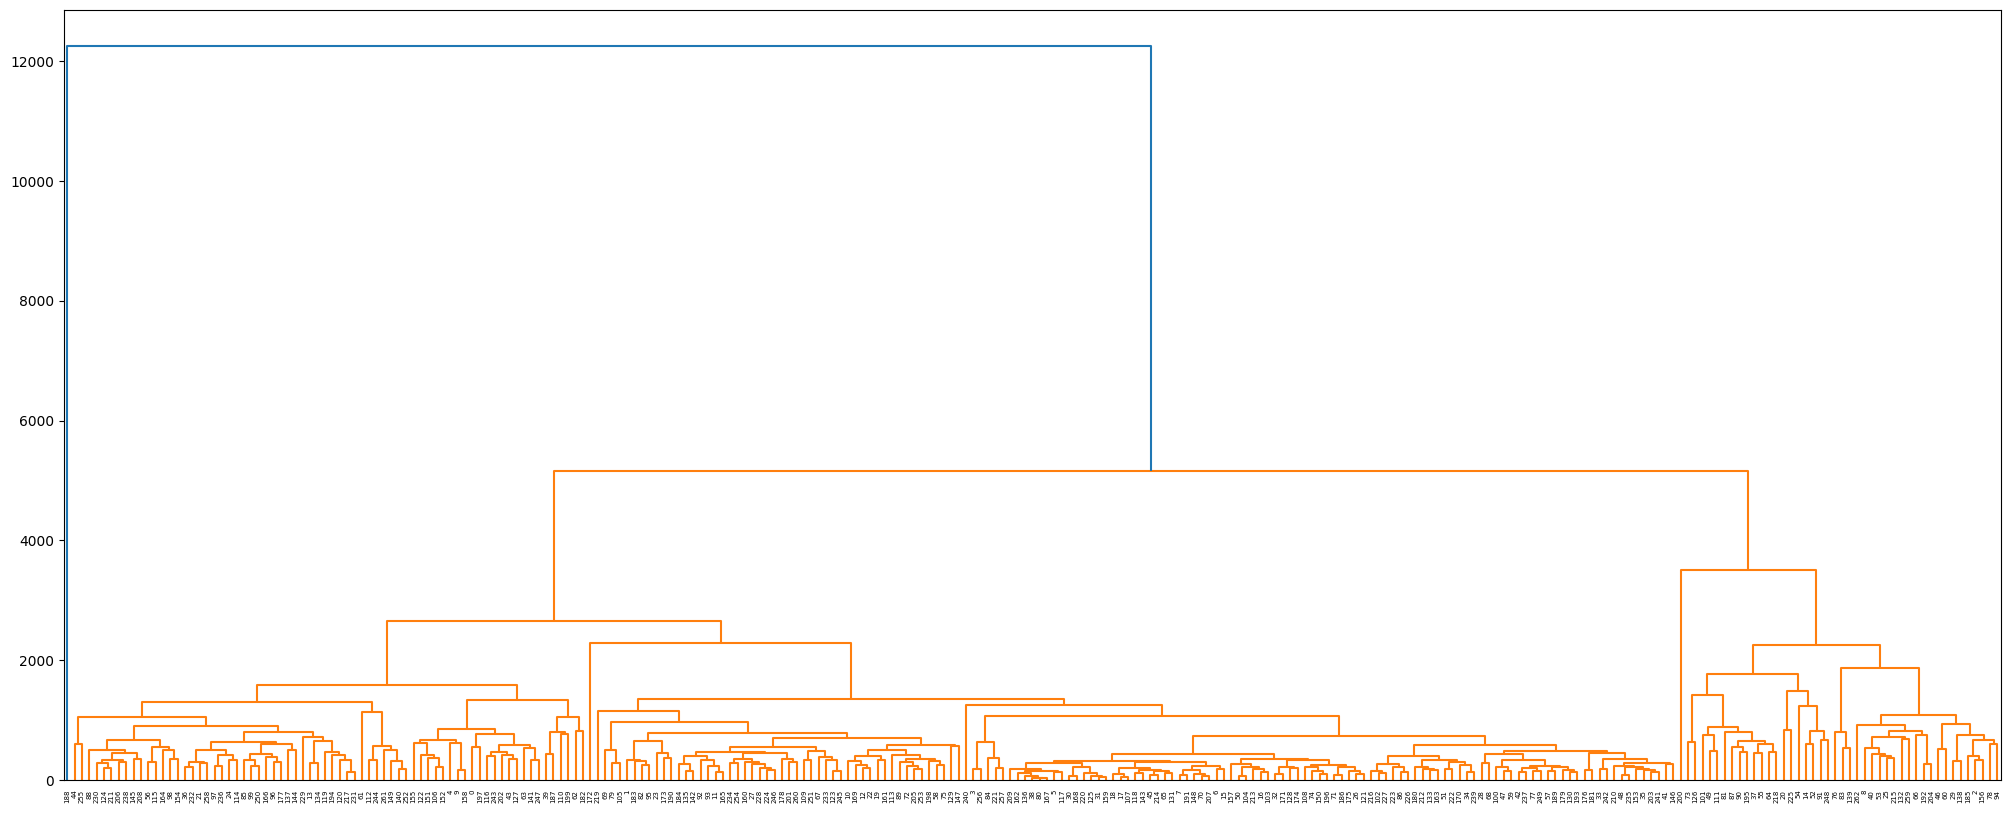

In [82]:
# Average
# Using average linkage, create and display a dendogram.
# INSERT CODE HERE
# Instanciation du modele
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Entrainnement du modele
model = model.fit(df)
# Effectuer un clustering hiérarchique avec un lien moyen
Z = linkage(df, 'average')

# Créer un dendrogramme
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.show()

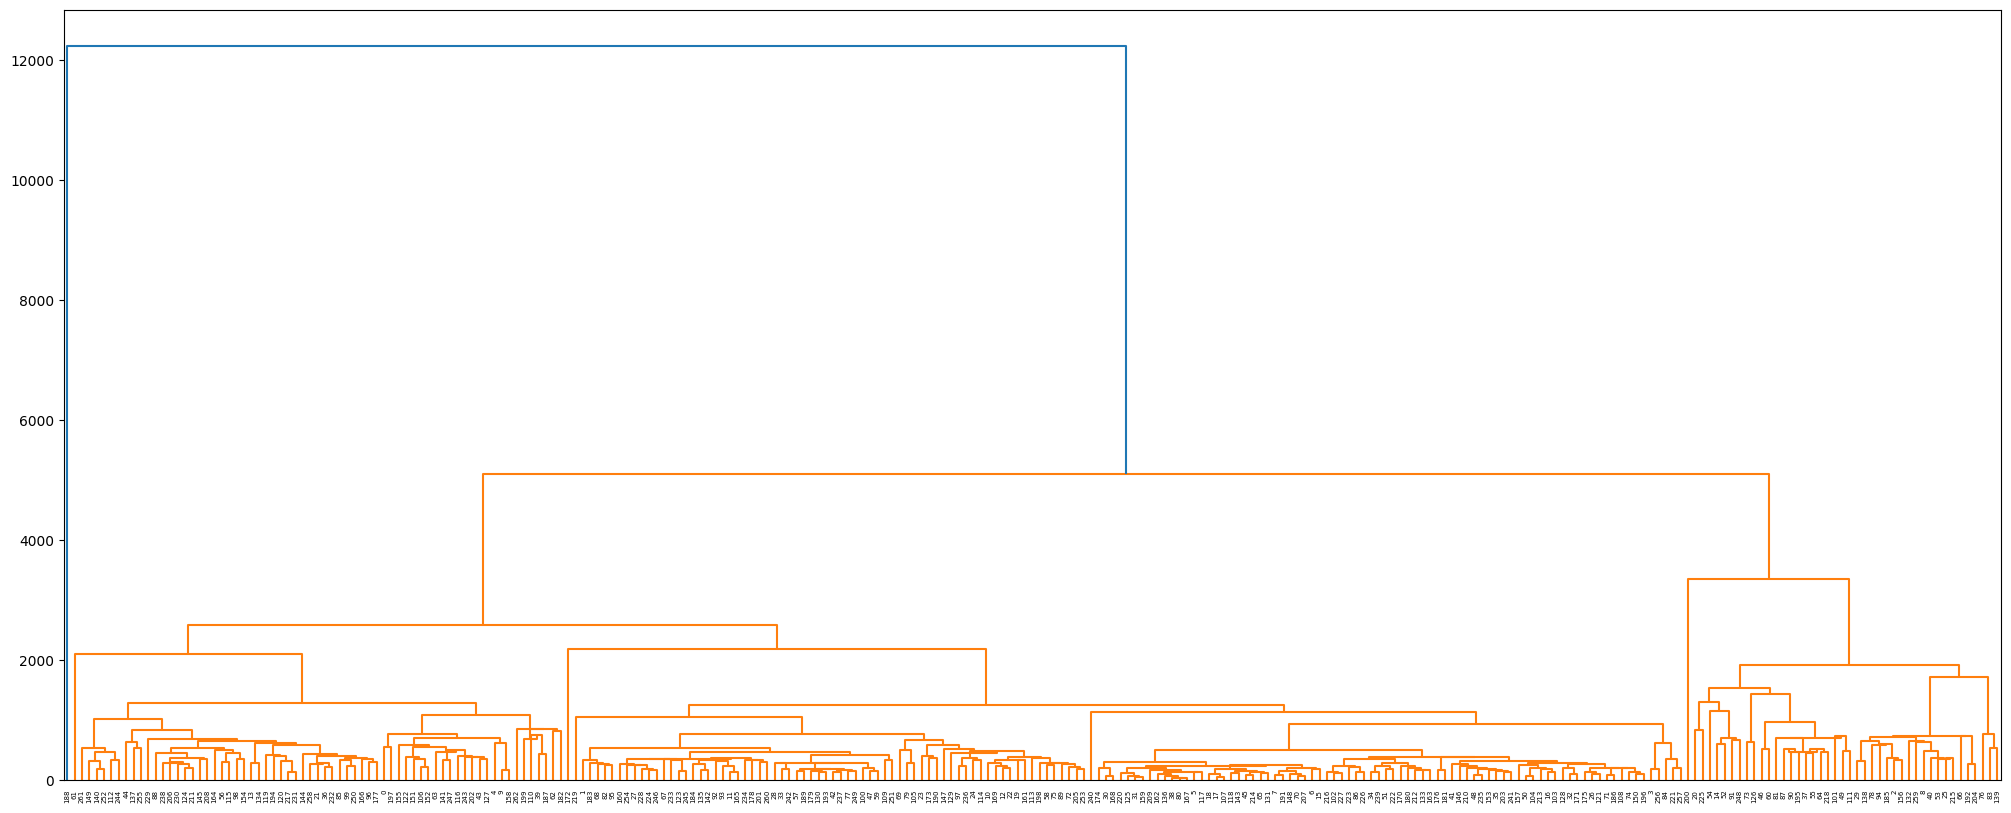

In [86]:
# Centroid
# Using centroid linkage, create and display a dendogram.
# INSERT CODE HERE

# Instanciation du modele
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Entrainnement du modele
model = model.fit(df)
# clustering hiérarchique avec un lien par les centres de gravité
Z = linkage(df, 'centroid')

# Créer un dendrogramme
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.show()

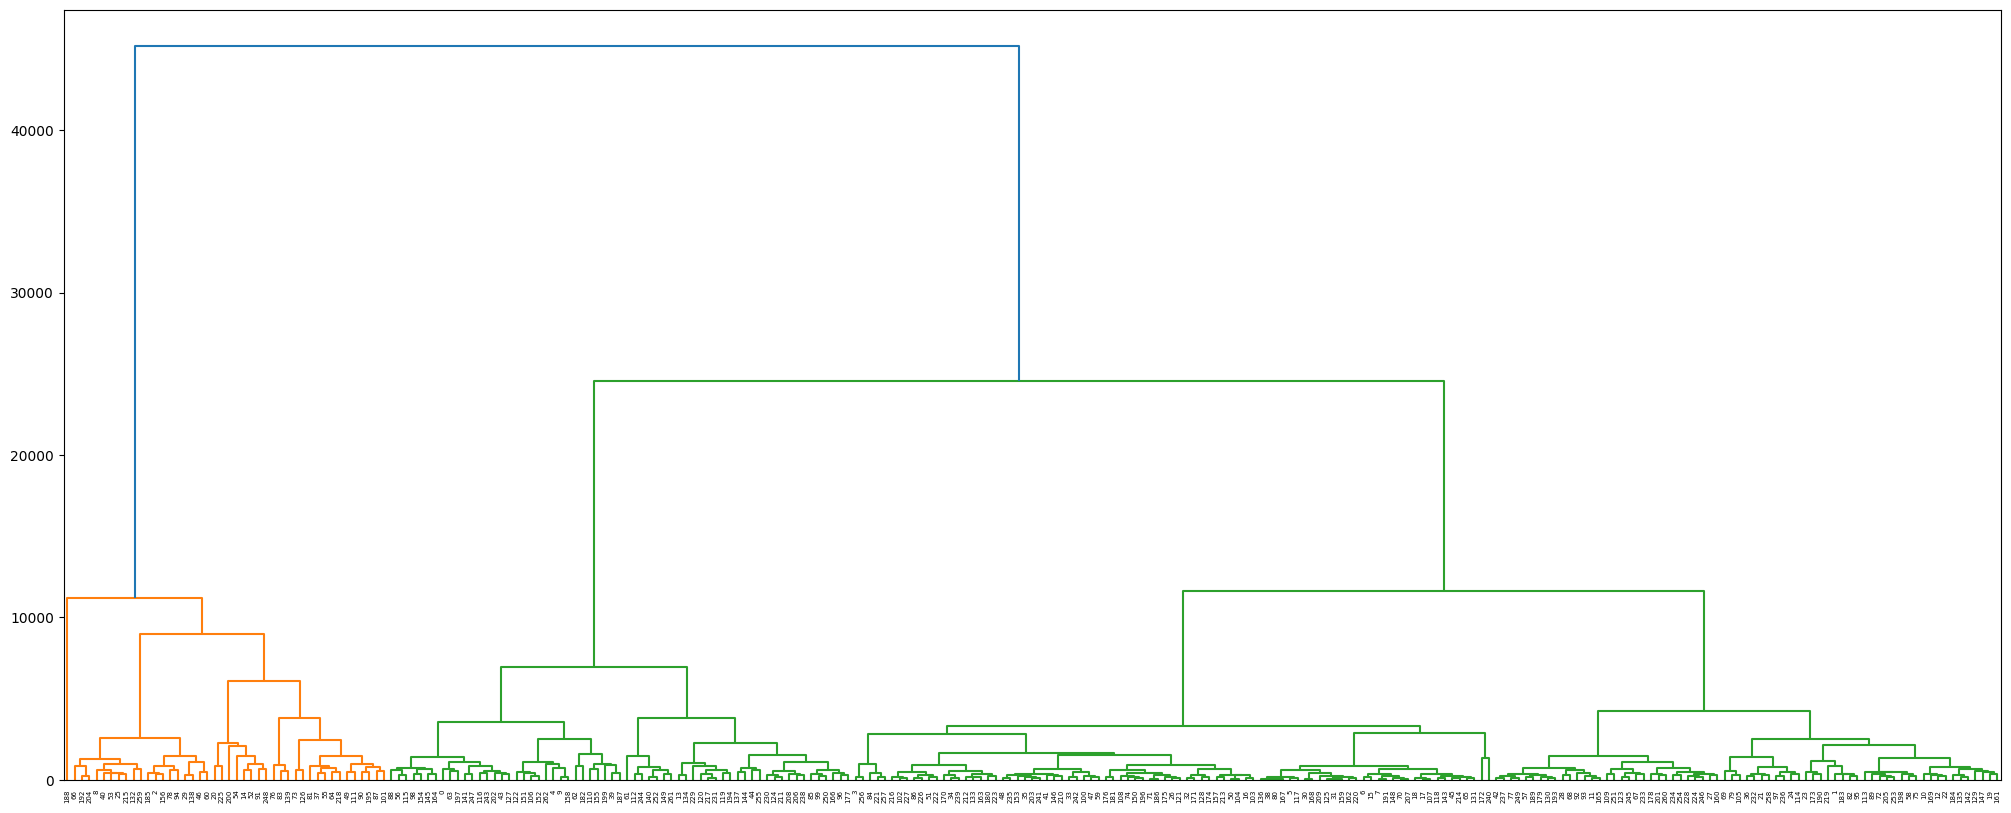

In [75]:
# Instanciation du modele
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Entrainnement du modele
model = model.fit(df)
# clustering hiérarchique avec un lien de Ward
Z = linkage(df, 'ward')

# Créer un dendrogramme
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.show()

In [92]:
# Instanciation du modele

from sklearn.cluster import AgglomerativeClustering
# model = AgglomerativeClustering( n_clusters=2, linkage= "average" )
model = AgglomerativeClustering(n_clusters=2, linkage='average')
# Entrainnement du modele
model = model.fit(df)
# clustering hiérarchique avec un lien de HAC
# Z = linkage(df, 'ward')

# Créer un dendrogramme
fig = plt.figure(figsize=(25, 10))
# dn = dendrogram(Z)
# dn = dendrogram(model)

plt.show()

#  erreur due à l’utilisation incorrecte de la fonction dendrogram. Cette fonction attend une matrice de lien, pas un modèle de clustering.
# pour obtenir la matrice de lien en utilisant la fonction linkage de scipy.cluster.hierarchy
# Z = linkage(df, 'ward')
# dn = dendrogram(Z)

<Figure size 2500x1000 with 0 Axes>

In [ ]:
# Instanciation du modele
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Entrainnement du modele
model = model.fit(df)
# clustering hiérarchique avec un lien de HAC
Z = linkage(df, 'ward')

# Créer un dendrogramme
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.show()

In [77]:
# After observing the dendograms above, let's say that you want to choose "Average" linkage with only 2 clusters.
# What are the labels of each of the datapoints?
# Print these labels out
# INSERT CODE HERE
from sklearn.cluster import AgglomerativeClustering
# # Instanciation du modele
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# # Entrainnement du modele
# model = model.fit(df)
# instanciation de AgglomerativeClustering avec 2 clusters
model = AgglomerativeClustering(n_clusters=2, linkage='average')

# Entrainnement
model = model.fit(df)

# Imprimer les étiquettes de chaque point de données
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
